# Построение движка для игр на pygame - урок 4

## Повторение

Нам нужно было проверить новый класс __Object__ на новой рисовалки:

In [2]:
from first_engine.game import Game
from first_engine.objects import Object


class FirstGame(Game):

    def run(self):

        draw = False
        w, h = 5, 5
        brash = Object(parent=self.surface, width=w, height=w)

        while self.RUNNER:
            self.fps_counter(60000)
            self.display_update()

            for event in self.events():
#                 print(event)  # отслеживание событий

                if event.type == 1025:
                    draw = True
                    if event.button == 1:
                        brash.color = (255, 255, 255)
                        brash.body.center = event.pos
                        brash.blit()
                    elif event.button == 3:
                        brash.color = self.color
                        brash.body.center = event.pos
                        brash.blit()
                elif event.type == 1026:
                    draw = False

                if draw and event.type == 1024:
                    brash.body.center = event.pos
                    brash.blit()

                if event.type == 1027:
                    w += event.y
                    h += event.y
                    if w < 1 or h < 1:
                        w, h = 1, 1
                    brash = Object(parent=self.surface, width=w, height=h)

                if event.type == 768 and event.key == 99:
                    self.window_fill()

                self.close(event)


FirstGame().run()

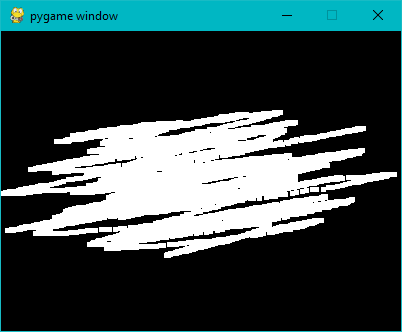

Здесь проблема в том, что мы не можем стирать на маус 2, так как мы задаем цвет кисти только на этапе её создания.<br>
Поэтому мы будем переназначать цвет при нажатии на кнопки, при помощи дополнительного метода.

In [3]:
import pygame

class Object:

    def __init__(self, parent: pygame.Surface,
                 width=40, height=40, x=0, y=0,
                 color=(255, 255, 255)):
        self.parent = parent
        self.color = color # выделим для цвета отдельную переменную

        self.skin = pygame.Surface(size=(width, height))
        self.body = self.skin.get_rect(topleft=(x, y))

    def blit(self):
        self.parent.blit(source=self.skin, dest=self.body)
        
    def recolor(self, color):
        self.skin.fill(color=color) # это метод на случай если мы захотим поменять цвет объекта

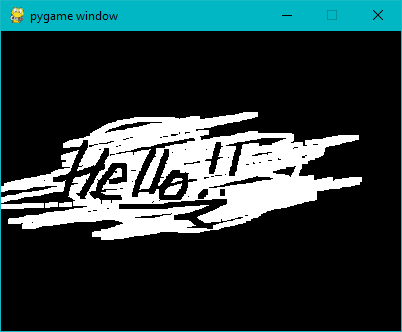

# Клава-мышь

До сих пор мы делали сложну конструкцию для управлекния персонажем:

In [4]:
from first_engine.game import Game
from first_engine.objects import Object
import pygame


class FirstGame(Game):

    def run(self):

        char = Object(self.surface, x=100, y=100)
        speed_x, speed_y = 0, 0 # скорость по x и y

        while self.RUNNER:
            self.fps_counter()
            self.display_update()
            self.window_fill()

            char.blit()

            char.body.x += speed_x # постоянно прибавляем скорость по x
            char.body.y += speed_y # постоянно прибавляем скорость по y

            for event in self.events():
#                 print(event)  # отслеживание событий
                
                if event.type == 768: # а этом блоке изметяем скорость от -1 до 1, для х и у, при нажати
                    if event.key == 100:
                        speed_x = 1
                    if event.key == 97:
                        speed_x = -1
                    if event.key == 119:
                        speed_y = -1
                    if event.key == 115:
                        speed_y = 1
                if event.type == 769: # а этом блоке изметяем скорость до 0, для х и у, при отжатии
                    if event.key == 100:
                        speed_x = 0
                    if event.key == 97:
                        speed_x = 0
                    if event.key == 119:
                        speed_y = 0
                    if event.key == 115:
                        speed_y = 0

                self.close(event)


FirstGame().run()

#### Здесь происходит следующее:

Дело в том что __event__ отслеживает только факт начатия и отжатие клавищи, то есть мы можем заставить двигаться перса при каждом нажатии или отжатии - __мы не можем напрямую отслежваться факт зажатия клавиши!__ Поэтому вы делаем буферную переменную __speed__ поторая принимает на себя новое значенгие при каждом нажатии или отжати клавиши, а потом текущее значение прибавляет к координатам перса, идея красивая, но работает не оптимально, конечно мы можем завернуть это в очередной метод класса Game и уменьшить код таким образом мы как бы эмулируем зажатие, но - это кастыль!

Но даже сдесь еще нужно дорабатывать код, так как иногда при быстром переключении клавишь персонаж может застривать

На самом деле у pygame уже есть метод для отслеживания зажатий, давайте его рассмотрим:

In [6]:
from first_engine.game import Game
import pygame


class FirstGame(Game):

    def run(self):

        while self.RUNNER:

            print(pygame.key.get_pressed()) # отслеживание зажатых клавишь

            for event in self.events():
                self.close(event)


FirstGame().run()

Здесь нам будет выводиться огромный вектор нулей, которые будут менять свои значения на 1 при нажатии и зажатии клавишь и 0 при отжатии клавиши<br>
Понимая это мы можем сделать так:

In [7]:
from first_engine.game import Game
from first_engine.objects import Object
import pygame


class FirstGame(Game):

    def run(self):

        char = Object(self.surface, x=100, y=100)

        while self.RUNNER:
            self.fps_counter()
            self.display_update()
            self.window_fill()

            char.blit()

            char.body.x += pygame.key.get_pressed()[100]
            char.body.x -= pygame.key.get_pressed()[97]
            char.body.y += pygame.key.get_pressed()[115]
            char.body.y -= pygame.key.get_pressed()[119]

            for event in self.events():
                # print(event)  # отслеживание событий

                self.close(event)


FirstGame().run()

Этот код не только короче, но и не требует создания буферных переменных, а что самое главное он отслеживает зажатие клавишь!

В данном случае скорость нашего персонажа = 1, это значит, что мы можем ускорить его если умножим на какой то коэффициент, например на 2

In [27]:
from first_engine.game import Game
from first_engine.objects import Object
import pygame


class FirstGame(Game):

    def run(self):

        char = Object(self.surface, x=100, y=100)

        while self.RUNNER:
            self.fps_counter(60)
            self.display_update()
            self.window_fill()

            char.blit()

            char.body.x += pygame.key.get_pressed()[100] * 2
            char.body.x -= pygame.key.get_pressed()[97] * 2
            char.body.y += pygame.key.get_pressed()[115] * 2
            char.body.y -= pygame.key.get_pressed()[119] * 2
 
            for event in self.events():
                # print(event)  # отслеживание событий

                self.close(event)


FirstGame().run()

Есть проблема с нашим коэффициентом, если мы захотим уменьшить скорость персонажа, например умножив на 0.5, то он не будет двигаться вправо и вниз, но будет двигаться влево и вверх, так как тело персонажа округляет прибавляемый коэффициент в меньшую сторону.

In [31]:
from first_engine.game import Game
from first_engine.objects import Object
import pygame


class FirstGame(Game):

    def run(self):

        char = Object(self.surface, x=100, y=100)
        speed = 0.5

        while self.RUNNER:
            self.fps_counter(60)
            self.display_update()
            self.window_fill()

            char.blit()

            char.body.x += pygame.key.get_pressed()[100] * speed
            char.body.x -= pygame.key.get_pressed()[97] * speed
            char.body.y += pygame.key.get_pressed()[115] * speed
            char.body.y -= pygame.key.get_pressed()[119] * speed
 
            for event in self.events():
                # print(event)  # отслеживание событий

                self.close(event)


FirstGame().run()

Для того что бы этого избежать, мы будем считать местоположение персонажа отдельно, а не в теле, как до этого и только после расчета будем создавать тело персонажа на новых координатах, а дальше пусть оно округляет свое место положение сколько влезет, все = будет двигаться с нашей скоростью)

In [38]:
from first_engine.game import Game
from first_engine.objects import Object
import pygame


class FirstGame(Game):

    def run(self):
        
        x = 100
        y = 100
        char = Object(self.surface, x=x, y=y)
        speed = 0.5

        while self.RUNNER:
            self.fps_counter(60)
            self.display_update()
            self.window_fill()
            
            char_body = char.skin.get_rect(topleft=(x, y))
            self.surface.blit(source=char.skin, dest=char_body)

            x += pygame.key.get_pressed()[100] * speed
            x -= pygame.key.get_pressed()[97] * speed
            y += pygame.key.get_pressed()[115] * speed
            y -= pygame.key.get_pressed()[119] * speed
 
            for event in self.events():
                # print(event)  # отслеживание событий

                self.close(event)


FirstGame().run()

Добавим в класс Object новый метод, а так же параметр класса - скорость, который мы будем использовать как коеффициент для настраивания скорости, и сохраним X и Y в переменные класса

In [ ]:
import pygame


class Object:

    def __init__(self, parent: pygame.Surface,
                 width=40, height=40, x=0, y=0,
                 color=(255, 255, 255), 
                 speed=1): # по умолчанию скорость = 1
        ...
        # сохраним дополнительные параметры класса
        self.x = x
        self.y = y
        self.speed = speed

    def blit(self):
        self.body.topleft = self.x, self.y # теперь в этом методе мы так же будем менять координаты тела
        self.parent.blit(source=self.skin, dest=self.body)
        
    def recolor(self, color):
        ...

    def motion(self): # создаем метод для управления движением
        # здесь отслеживаем нажатие кнопок
        left = pygame.key.get_pressed()[97]
        right = pygame.key.get_pressed()[100]
        up = pygame.key.get_pressed()[115]
        down = pygame.key.get_pressed()[119]
        
        # а здесь меняем координаты
        self.x -= left * speed
        self.x += right * speed
        self.y += up * speed
        self.y -= down * speed
        
    def change_speed(self):
        self.speed = speed

In [44]:
import matplotlib.pyplot as plt

И еще 1, когда наш перс двигается по диагонали, то его скорость становится = сумме векторов - то есть персонаж по диагонали движется быстрее, чем по осям.

Это надо исправить. Для этого расчитаем скорость с которой персонаж должен двигаться по диагонали.

In [137]:
speed = 4 # допустим скорость = 4

speed_xy = (speed ** 2 + speed ** 2) ** (1 / 2)  # находим длину вектора x + y по пифагору
print(speed_xy)

5.656854249492381


In [138]:
speed_xy = speed / speed_xy  # находим долю скорости от суммы векторов
print(speed_xy)

0.7071067811865475


In [139]:
speed_xy *= speed  # находим скорость для движения по диагонали
print(speed_xy)

2.82842712474619


Добавим новый метод в класс __Object__ и дополним метод __motion__

In [ ]:
import pygame


class Object:

    ...
    
    def __diagonal_speed(self):
        speed_xy = (self.speed ** 2 + self.speed ** 2) ** (1 / 2)  # находим длину вектора x + y по пифагору
        speed_xy = self.speed / speed_xy  # находим долю скорости от суммы векторов
        speed_xy *= self.speed  # теперь находим скорость по диагонали
        return speed_xy # возвращаем результат
    
    def motion(self): # метод для перемещения объекта
        self.body.x, self.body.y = self.x, self.y # присваиваем координатам тела коодинаты местоположения
    
    def motion_control(self):
        left = pygame.key.get_pressed()[97]
        right = pygame.key.get_pressed()[100]
        up = pygame.key.get_pressed()[115]
        down = pygame.key.get_pressed()[119]
        
        # если зажаты более 2 кнопок то расчитываем диагональную скорость
        speed = self.__diagonal_speed() if (left + right + up + down) > 1 else self.speed

        self.x += right * speed
        self.y += down * speed

        if speed % 1 != 0:               # так как тело округляет свои координаты в меньшую сторону,
            self.x -= left * (speed - 1) # если ему присваивается число с плавающей точкой,
            self.y -= up * (speed - 1)   # то мы будим вычитать 1 из скорости
        else:
            self.x -= left * speed
            self.y -= up * speed
        
        self.motion()
        return speed
    
    def change_speed(self, speed): # ну а это метод на стучай если мы захотим менять скорость персонажа в процессе игры
        self.speed = speed
        return speed

# Взаимодействие объектов - обработка столкновений

Теперь, когда у нас есть основа для написания игры и создания объектов, мы можем приступить к более интересным вещам)

В играх почти все объекты могут взаимодействоввать с персонажем, а иногда и друг с другом. Персонаж стоит на полу, и не проваливается в него, упирается в стены - потому что они взаимодествуют с персонажем - выталкивают его. Получает или наносит повреждение врагам или общается с НПС и так далее.

Но начнем с преград, то есть со стен и пола.

# Задание:

- на основе движка написанного нами, опишите преграды экрана, так, что бы персонаж не мог их покинуть